In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

plt.rc('font', family='malgun gothic')

# 1. 20 ~ 23년도 겟앰프드 검색어 수 트렌드

In [2]:
df_gt = pd.read_csv('./multiTimeline_20_21.csv').iloc[1:,:].reset_index()
df_gt.columns = ['날짜', '검색수']
df_gt

,날짜,검색수
0,2020-01-05,30
1,2020-01-12,26
2,2020-01-19,42
3,2020-01-26,29
4,2020-02-02,28
...,...,...
99,2021-11-28,64
100,2021-12-05,58
101,2021-12-12,72
102,2021-12-19,87


In [3]:
# 데이터 타입 변환
df_gt['검색수'] = df_gt['검색수'].astype('int')
df_gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      104 non-null    object
 1   검색수     104 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


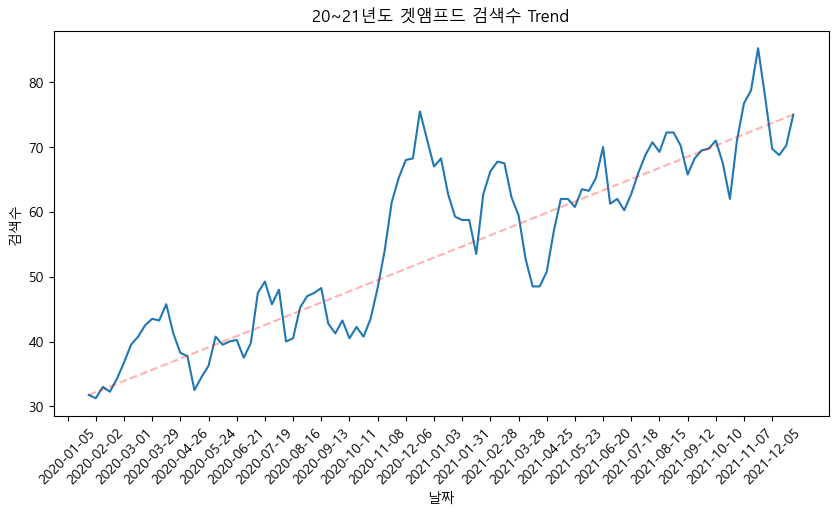

In [4]:
# 20 ~ 21년도 겟앰프드 검색 수 trend에 대한 그래프
df_m5 = pd.DataFrame([df_gt.날짜,df_gt.검색수.rolling(4).mean()]).T

plt.figure(figsize = (10, 5))
sns.lineplot(x = '날짜', y = '검색수', data = df_m5)
plt.plot([3, 103], [31.75, 75], 'r--', alpha = 0.3)
plt.xticks(ticks = [i for i in range(0, 104, 4)], labels = df_gt.iloc[::4,:].날짜.values, rotation = 45)
plt.title('20~21년도 겟앰프드 검색수 Trend')
plt.show()

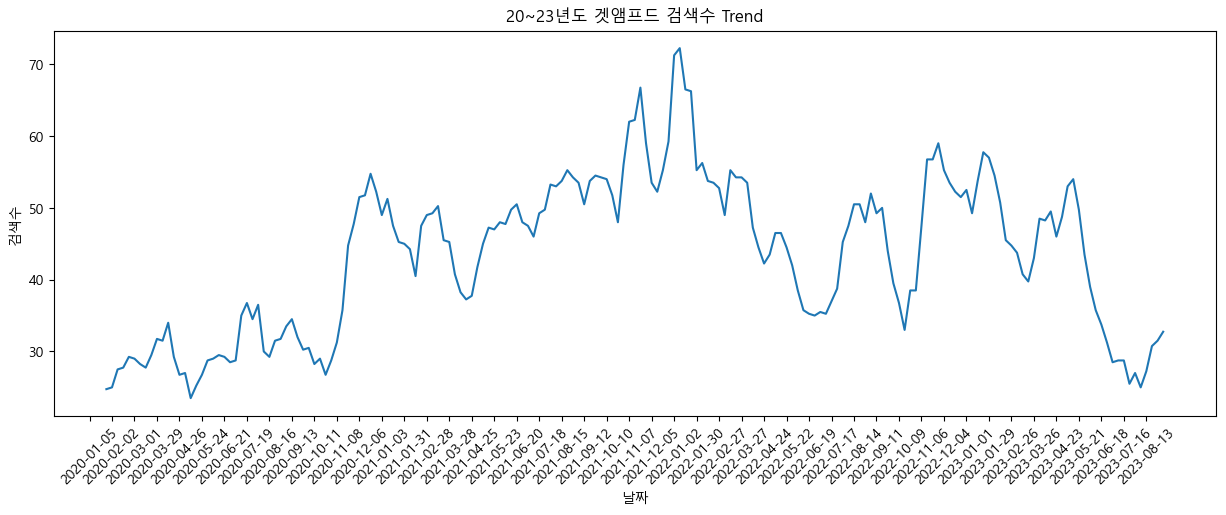

In [5]:
# 20 ~ 23년도 겟앰프드 검색 수 trend에 대한 그래프

df_gt2 = pd.read_csv('./multiTimeline_20_23.csv')

df_m5 = pd.DataFrame([df_gt2.날짜,df_gt2.검색수.rolling(4).mean()]).T

plt.figure(figsize = (15, 5))
sns.lineplot(x = '날짜', y = '검색수', data = df_m5)
# plt.plot([3, 103], [31.75, 75], 'r--', alpha = 0.3)
plt.xticks(ticks = [i for i in range(0, 192, 4)], labels = df_gt2.iloc[::4,:].날짜.values, rotation = 45)
plt.title('20~23년도 겟앰프드 검색수 Trend')
plt.show()

# 2. 유저의 액세서리 선호도 분석

### 계급 selecting

In [6]:
df = pd.read_csv('./getamped.csv', index_col = 0).iloc[:199,:]
df

,계급,액세서리
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두"
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브"
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼"
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트"
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일"
...,...,...
194,은곰발,"천상의날개옷,히어로브로우스렛"
195,은곰발,"엽기햄스터슈트,어비스인페르노,멀티슬래셔X,빅마우스"
196,동곰발,"멀티슬래셔X,배틀로드"
197,동곰발,"인페르노블릿,어비스인페르노,베지파머"


In [7]:
# 계급별 labeling
class_level = {
    '금황룡' : 0, '은황룡' : 1, '동황룡' : 2, '금청룡' : 3, '은청룡' : 4, '동청룡' : 5, '금백호' : 6, '은백호' : 7, '동백호' : 8, '금주작' : 9, '은주작' : 10,
       '동주작' : 11, '금현무' : 12, '은현무' : 13, '동현무' : 14, '금코발' : 15, '은코발' : 16, '동코발' : 17, '금곰발' : 18, '은곰발' : 19,
       '동곰발' : 20
}


df['계급_label'] = df['계급'].map(class_level)

df.head()

,계급,액세서리,계급_label
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼",3
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트",4
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일",4


In [9]:
# level select
def levelselect(data, start = '동곰발', end = '동황룡'):

    if start == end:
        df = data.query(f'계급 == {start}')
        
    else:
        s = class_level.get(start)
        e = class_level.get(end)
        
        if s < e:
            df = data.query(f'계급_label >= {s} and 계급_label <= {e}')
        else:
            df = data.query(f'계급_label >= {e} and 계급_label <= {s}')
        
    df.reset_index(drop = True, inplace = True)
    return df


selected_data = levelselect(df, '동백호', '금백호')

selected_data.head()

,계급,액세서리,계급_label
0,금백호,"서브마린트랜스포머,라이트서번트,엽기양슈트,강염궁,견인포우르반",6
1,금백호,"파워클리너,미스터리오브,창현궁,미스터리큐브,천상의날개옷",6
2,금백호,"미스터리큐브,아크로니카소드,트랜스볼,악령의팔찌,로켓티어",6
3,금백호,"리치완드,폭파장갑,익스팬션암즈,사타닉스피릿,키메라건틀릿",6
4,금백호,"아라크네,브르위프,악마의날개,백사권,메두사의방패",6


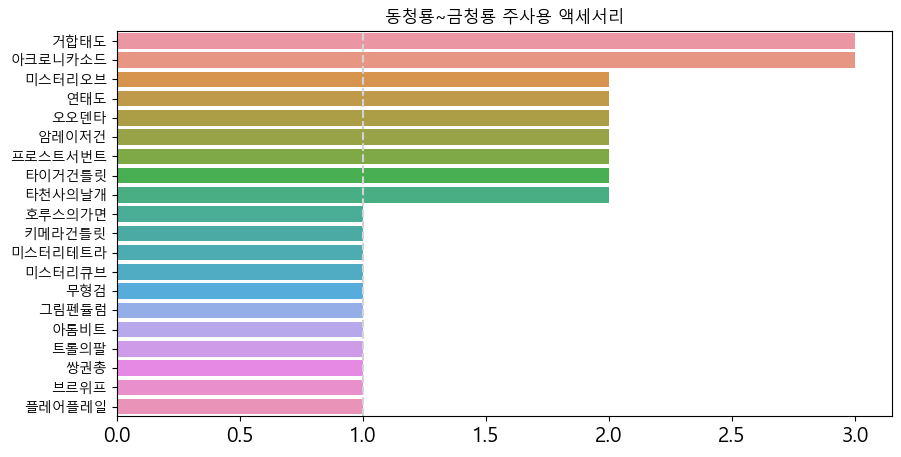

In [10]:
# 계급 구간별 액세서리 사용 빈도 counting

def count_accessory(data, start_lv = '동곰발', end_lv = '동황룡'):
    sdf = levelselect(data, start_lv, end_lv)
    
    count = {}
    l = []
    for i in range(len(sdf)):
        l += sdf['액세서리'][i].split(',')

    for x in l:
        try:
            count[x] += 1
        except:
            count[x] = 1

    sort_count = sorted(count.items(), key = lambda x:x[1], reverse = True)

    accessory = []
    usedcount = []

    for x in sort_count:
        accessory.append(x[0])
        usedcount.append(x[1])
        
    avg_count = round(np.mean(usedcount))

    
    plt.figure(figsize = (10, 5))
    sns.barplot(y = accessory[:20], x = usedcount[:20], orient = 'h')
    plt.axvline(x = avg_count, color = 'lightgray', linestyle = '--')
    plt.title(f'{start_lv}~{end_lv} 주사용 액세서리')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 10)
    plt.show()
    
    return sort_count
t = count_accessory(df, '동청룡', '금청룡')

### 액세서리 평점 추출 및 유저별 선호도 시각화

In [12]:
df_score = pd.read_csv('./겟앰상점악평점.csv', encoding = 'cp949').iloc[:,1:]
df_score.head()

,액세서리,외형,성능,재미
0,공수도플레임,8.8,9.2,9.5
1,황혼의달,9.3,8.5,8.5
2,프로즌글러브,8.8,8.9,8.8
3,봉인의지팡이(퍼플),5.8,7.8,6.2
4,아쿠아기어,9.5,9.7,9.7


In [17]:
# 각 유저별 사용 액세서리에 따른 외형, 성능, 재미 평점 산출

df['외형'], df['성능'], df['재미'] = 0, 0, 0
for idx in range(len(df)):
    s_외형, s_성능, s_재미 = 0, 0, 0
    n = len(df['액세서리'][idx].split(','))
    for acc in df['액세서리'][idx].split(','):
        s_외형 += float(df_score.query(f'`액세서리` == "{acc}"')['외형'].values[0])
        s_성능 += float(df_score.query(f'`액세서리` == "{acc}"')['성능'].values[0])
        s_재미 += float(df_score.query(f'`액세서리` == "{acc}"')['재미'].values[0])
        
    df.loc[idx, '외형'] = round(s_외형/n, 3)
    df.loc[idx, '성능'] = round(s_성능/n, 3)
    df.loc[idx, '재미'] = round(s_재미/n, 3)
    
df.head()

,계급,액세서리,계급_label,외형,성능,재미
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2,9.42,9.40,9.40
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3,9.42,9.50,9.38
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼",3,9.52,9.30,9.32
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트",4,8.98,9.10,9.16
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일",4,9.34,9.08,9.18


In [18]:
# 평점 정보가 몰려있으므로 min-max normalization을 활용해 분포 scaling 및 radar chart 시각화
def normalization(arr):
    max_v = arr.max()
    min_v = arr.min()
    
    return (arr - min_v)/(max_v - min_v)

def radarchart(normalized_v, title):
    trace = go.Scatterpolar(r = normalized_v,
                        theta = ['외형', '성능', '재미'],
                        fill = 'toself')

    layout = go.Layout(title = title)

    fig = go.Figure(data = trace, layout = layout)
    fig.update_layout(polar = dict(radialaxis = dict(visible = True,
                                                    tickvals = [0, 0.5, 1],
                                                    ticktext = ['low', 'medium', 'high'])), showlegend = False)

    fig.show()

In [19]:
radarchart(normalization(df[['외형', '성능', '재미']].mean().values), '전체 유저 성향도')

In [20]:
radarchart(normalization(levelselect(df, '동청룡', '금황룡')[['외형', '성능', '재미']].mean().values), '청룡 계급 성향도')

In [21]:
radarchart(normalization(levelselect(df, '동백호', '금백호')[['외형', '성능', '재미']].mean().values), '백호 계급 성향도')

In [22]:
radarchart(normalization(levelselect(df, '동현무', '금주작')[['외형', '성능', '재미']].mean().values), '현무~주작 계급 성향도') 

In [23]:
radarchart(normalization(levelselect(df, '동곰발', '금코발')[['외형', '성능', '재미']].mean().values), '곰발~코발 계급 성향도') 

In [25]:
radarchart(normalization(df_score.iloc[:10,:][['외형', '성능', '재미']].mean().values), '최근 출시한 10개 액세서리의 평점 성향도') 